# Classification - Assignment 6

## Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

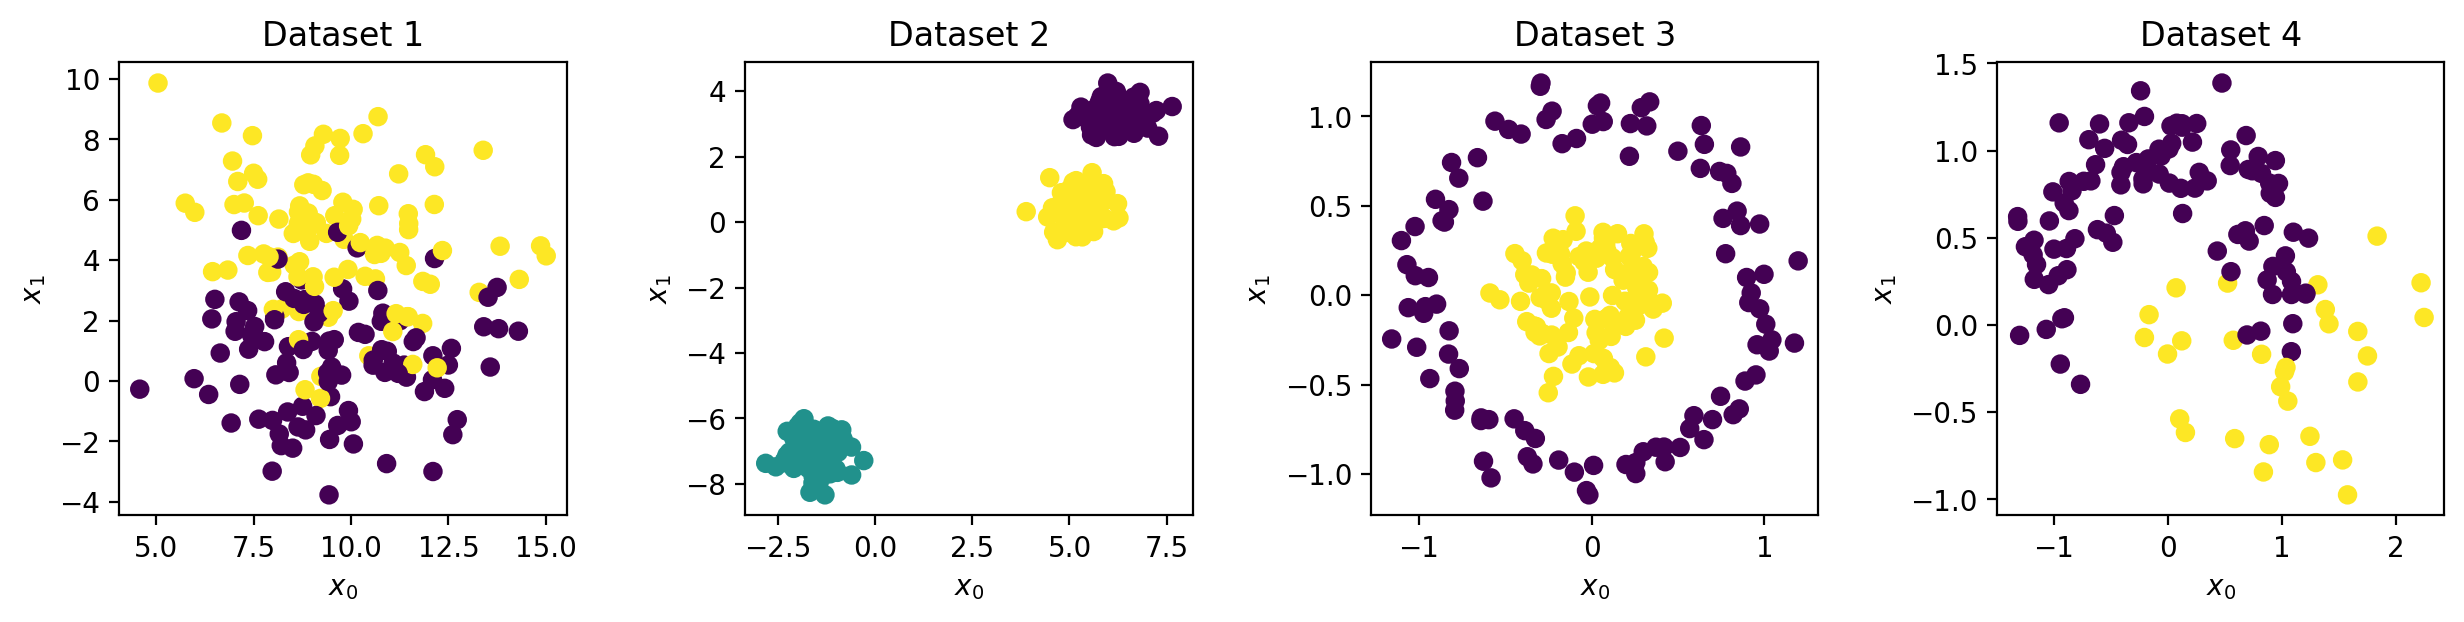

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles
np.random.seed(4)

noisiness = 1

X_blob, y_blob = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5 * noisiness, n_features = 2)

X_circles, y_circles = make_circles(n_samples = 200, factor = 0.3, noise = 0.1 * noisiness)

X_moons, y_moons = make_moons(n_samples = 200, noise = 0.25 * noisiness)

N_include = 30
idxs = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        idxs.append(i)
        Ni += 1
    elif yi == 0:
        idxs.append(i)

y_moons = y_moons[idxs]
X_moons = X_moons[idxs]

fig, axes = plt.subplots(1, 4, figsize = (15, 3), dpi = 200)

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]

labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:, 0], Xi[:, 1], c = yi)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')

fig.subplots_adjust(wspace = 0.4);

## 1. Discrimination Lines

**Derive the equation for the line that discriminates between the two classes.**

Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i=-1$ (class 2)

where $\bar{\bar{X}} = [\vec{x_0}, \vec{x_1}, \vec{1}]$ and $\vec{w} = [w_0, w_1, w_2]$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

> The discrimination line will be drawn where $\bar{\bar{X}}\vec{w}$=0.  
</br>  
$\bar{\bar{X}}\vec{w}$ = $w_0 x_0$ + $w_1 x_1$ + $w_2$=0  
</br>  
$\therefore x_1 = -\frac{w_0}{w_1}x_0 - \frac{w_2}{w_1}$

**Derive the discrimination line for a related non-linear model**

In this case, consider a model defined by:

$y_i = w_0 x_0 + w_1 x_1 + w_2 (x_0^2 + x_1^2)$

where the model predicts class 1 if $y_i > 0$ and predicts class 2 if $y_i \leq 0$.

The equation should be in the form of $x_1 = f(x_0)$. Show your work, and/or explain the process you used to arrive at the answer.

> Discrimination line: $w_0 x_0 + w_1 x_1 + w_2 (x^{2}_{0} + x^{2}_{1})$ = 0  
</br>  
$w_2 x^{2}_{1} + w_1 x_1 + w_2 x^{2}_{0} + w_0 x_0$ = 0  
</br>  
$x^{2}_{1} + \frac{w_1}{w_2} x_1 = -x^{2}_{0} - \frac{w_0}{w_2} x_0$  
</br>  
$\left(x_1 + \frac{w_1}{2w_2}\right)^2 = -x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}$  
</br>  
$\therefore x_1 = \pm\sqrt{-x_0\left(x_0 + \frac{w_0}{w_2}\right) + \frac{w^{2}_{1}}{4w^{2}_{2}}} - \frac{w_1}{2w_2}$

**Briefly describe the nature of this boundary.**

What is the shape of the boundary? Is it linear or non-linear?

> 1-1. Shape of the boundary: straight line and linear  
</br>  
1-2. Shape of the boundary: circle and non-linear

## 2. Assessing Loss Functions

In [3]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

In [4]:
def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0

**Write a function that computes the loss function for the perceptron model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [5]:
def perceptron(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    loss = sum(np.maximum(0, -y*Xb))
    
    return loss

**Write a function that computes the loss function for the logistic regression model.**

The function should take the followings as arguments:
- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$

You may want to use functions above.

In [6]:
def log_reg(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    exp_yXb = np.exp(-y * Xb)
    loss = sum(np.log(1 + exp_yXb))
    
    return loss

**Minimize the both loss functions using the Dataset 3 above.**

In [7]:
from scipy.optimize import minimize

w = [-10, -4, -10]

result_perceptron = minimize(perceptron, w, args = (X_circles, 2 * y_circles - 1))
result_log_reg = minimize(log_reg, w, args = (X_circles, 2 * y_circles - 1))

**What is the value of the loss function for the perceptron model after optimization?**

In [8]:
w_perceptron = result_perceptron.x
loss_perceptron = perceptron(w_perceptron, X_circles, 2 * y_circles - 1)
print(loss_perceptron)

1.723441663333635e-07


**What is the value of the loss function for the logistic regression model after optimization?**

In [9]:
w_log_reg = result_log_reg.x
loss_log_reg = log_reg(w_log_reg, X_circles, 2 * y_circles - 1)
print(loss_log_reg)

138.60070170523946


**What are the two main challenges of the perceptron loss function?**

> - non-differentiable at w = $\vec{0}$  
- trivial solution at w = $\vec{0}$

## 3. Support Vector Machine

**Write a function that computes the loss function of the support vector machine model.**

This functions should take the followings as arguments:

- weight vector $w$
- the feature matrix $\bar{\bar{X}}$
- the output vector $\vec{y}$
- regularization strength $\alpha$

You may want to use `add_intercept` and `linear_classifier` functions from the Problem 2.

In [10]:
def svm(w, X, y, alpha):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    loss = sum(np.maximum(0, 1 - y*Xb))
    loss += alpha * np.linalg.norm(w[1:], 2)
    
    return loss

**Evaluate the effect of regularization strength.**

Optimize the SVM model for **Dataset 1**.

Search over $\alpha$ = [0, 1, 2, 10, 100] and assess the loss function of the SVM model.

In [11]:
alphas = [0, 1, 2, 10, 100]

for alpha in alphas:
    result_svm = minimize(svm, w, args = (X_blob, 2 * y_blob - 1, alpha))
    w_svm = result_svm.x
    
    loss_svm = svm(w_svm, X_blob, 2 * y_blob - 1, alpha)
    print('Value of loss function with alpha = {}: {}'.format(alpha, loss_svm))

Value of loss function with alpha = 0: 74.19151063967898
Value of loss function with alpha = 1: 74.9684059609181
Value of loss function with alpha = 2: 75.7625348368162
Value of loss function with alpha = 10: 81.69977723457326
Value of loss function with alpha = 100: 127.00264726004937


**Plot the discrimination lines for $\alpha$ = [0, 1, 2, 10, 100].**

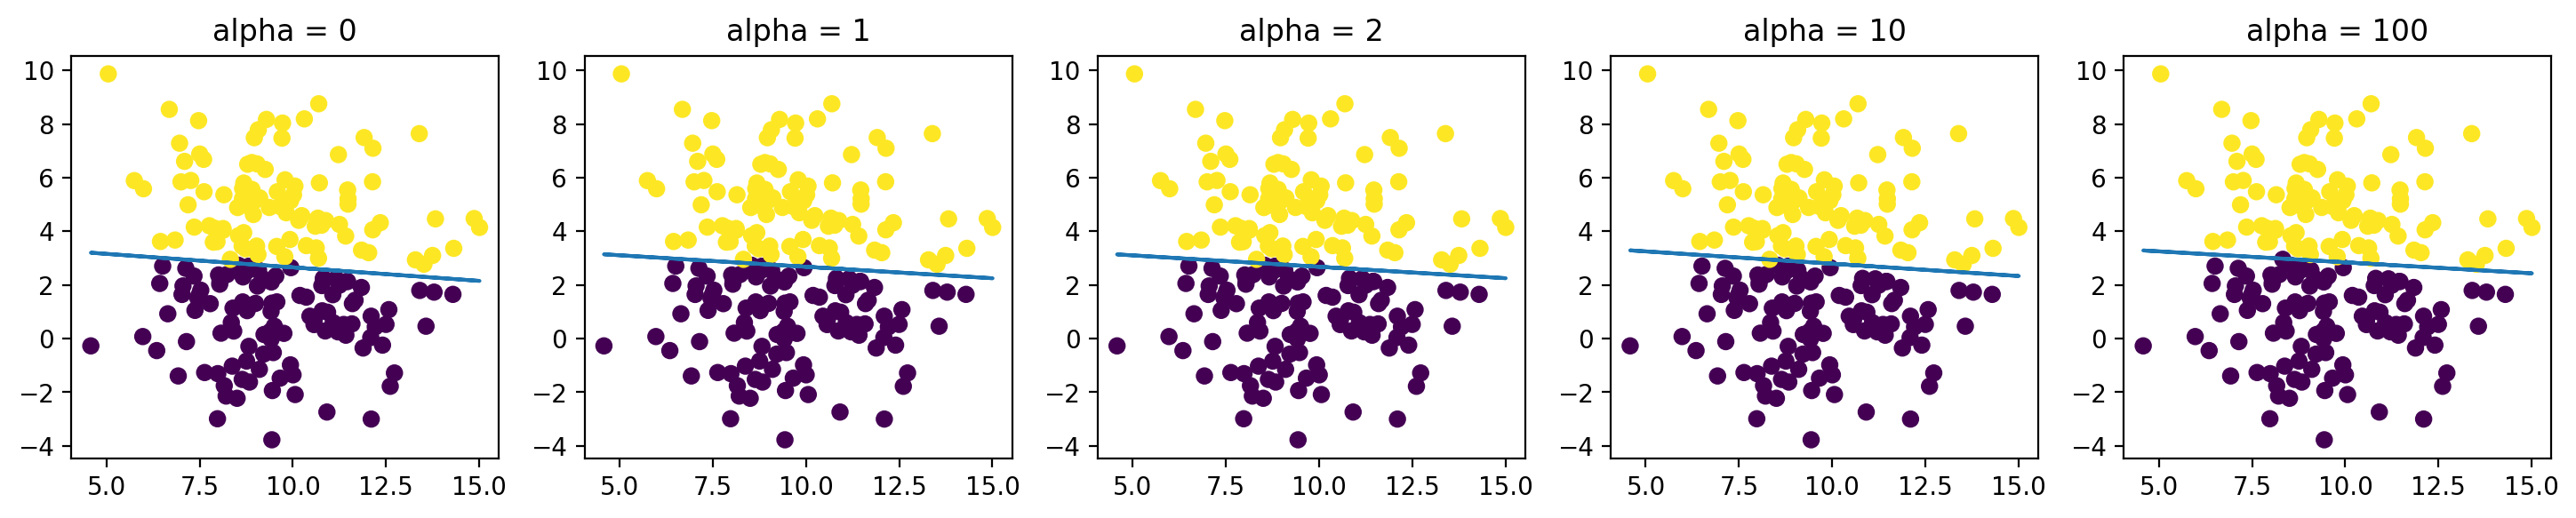

In [12]:
fig, axes = plt.subplots(1, 5, figsize = (18, 3), dpi = 200)

for i, alpha in enumerate(alphas):
    result_svm = minimize(svm, w, args = (X_blob, 2 * y_blob - 1, alpha))
    w_svm = result_svm.x
    
    prediction = linear_classifier(X_blob, w_svm)
    
    m = -w_svm[1] / w_svm[2]
    b = -w_svm[0] / w_svm[2]
    
    axes[i].scatter(X_blob[:, 0], X_blob[:, 1], c = prediction)
    axes[i].plot(X_blob[:, 0], m * X_blob[:, 0] + b, '-')
    
    axes[i].set_title('alpha = {}'.format(alpha))

**Find the optimal set of hyperparameters for an SVM model with Dataset 1.**

Use `GridSearchCV` and find the optimal value of $\alpha$ and $\gamma$.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')

# Note that candidates of gamma are not provided so please be aware of this when you do your peer review
# Focus on the process how your classmates approached this problem, not on the final result

# I will set a simple list of sigmas and transform it to a list of gammas
sigmas = np.linspace(5, 50, 10)
gammas = 1. / sigmas

Cs = 1. / np.array(alphas[1:])

param_grid = {'gamma': gammas, 'C': Cs}

# You can do train/test split before GridSearchCV
# In this solution, I won't
# Make sure that you have to shuffle the data before GridSearchCV unless you do train/test split

from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_blob, y_blob)

svm_search = GridSearchCV(svc, param_grid, cv = 3)
svm_search.fit(X_shuffle, y_shuffle)

opt_C = svm_search.best_estimator_.C
opt_gamma = svm_search.best_estimator_.gamma

print('Optimal C: {}'.format(opt_C))
print('Optimal gamma: {}'.format(opt_gamma))

Optimal C: 1.0
Optimal gamma: 0.2


**Calculate the accruacy, precision, and recall for the best model.**

You can write your own function that calculates the metrics or you may use built-in functions.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print('Accuracy: {}'.format(accuracy_score(y_blob, svm_search.best_estimator_.predict(X_blob))))
print('Precision: {}'.format(precision_score(y_blob, svm_search.best_estimator_.predict(X_blob))))
print('Recall: {}'.format(recall_score(y_blob, svm_search.best_estimator_.predict(X_blob))))

Accuracy: 0.87
Precision: 0.9021739130434783
Recall: 0.83


**Plot the confusion matrix.**

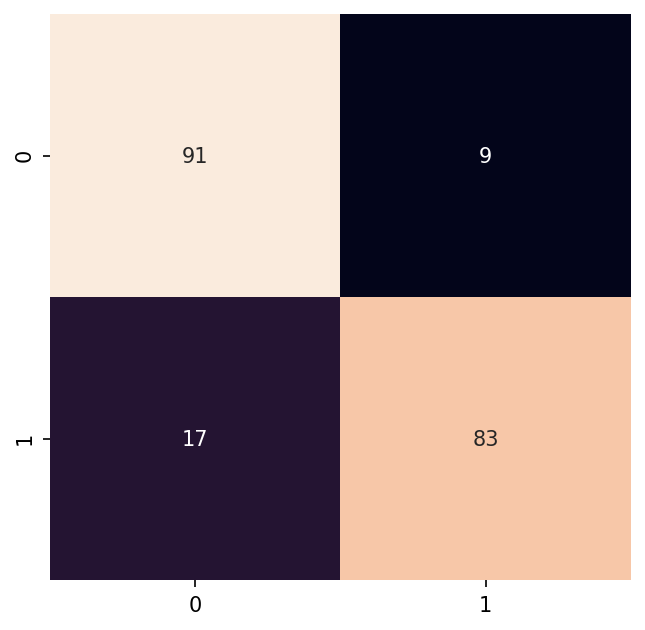

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_blob, svm_search.best_estimator_.predict(X_blob))

fig, ax = plt.subplots(figsize = (5, 5), dpi = 150)
sns.heatmap(cm, annot = True, ax = ax, cbar = False);

**What happens to the decision boundary as $\alpha$ goes to $\infty$?**

> The weights will be over-regularized such that the boundary will be a straight line.

**What happens to the decision boundary as $\gamma$ goes to 0?**

> If $\gamma$ goes to 0, each element in RBF kernel will be just 1. This means that data points become indistinguishable even though they are far from each other. As a result, the boundary will enclose all the data points.

## 4. 6745 Only: Analytical Derivation

**Derive an analytical expression for the gradient of the softmax function with respect to $\vec{w}$.**

The **softmax** loss function is defined as:

$g(\vec{w}) = \sum_i log(1 + \exp{(-y_i \vec{x}_i^T \vec{w}}))$

where $\vec{x}_i$ is the $i$-th row of the input matrix $\bar{\bar{X}}$.

*Hint 1: The function $g(\vec{w})$ can be expressed as $f(r(s(\vec{w})))$ where $r$ and $s$ are arbitrary functions and the chain rule can be applied.*

*Hint 2: You may want to review Ch. 4 of "Machine Learning Refined, 1st Ed."*

> $log\left\{1 + exp(-y_i\vec{x_i}^T\vec{w})\right\} = f(r(s(\vec{w})))$ where $f(r) = log\left\{r\right\}$, $r(s) = 1 + e^{-s}$, $s(\vec{w})=y_i\vec{x_i}^T\vec{w}$  
</br>  
Using the chain rule,  
</br>  
> $\frac{\partial}{\partial\vec{w}}f(r(s(\vec{w})))=\frac{df}{dr}\cdot\frac{dr}{ds}\cdot\frac{\partial}{\partial\vec{w}}s(\vec{w})=\frac{1}{r}\cdot(-e^{-s})\cdot y_i\vec{x_i}=\frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$  
</br>  
$\therefore \frac{\partial g(\vec{w})}{\partial \vec{w}}=\sum_i \frac{1}{1+e^{-y_i\vec{x_i}^T\vec{w}}}\cdot(-e^{-y_i\vec{x_i}^T\vec{w}})\cdot y_i\vec{x_i}$

**Optional: Logistic regression from the regression perspective**

An alternate interpretation of classification is that we are performing non-linear regression to fit a **step function** to our data (because the output is whether 0 or 1). Since step functions are not differentiable at the step, a smooth approximation with non-zero derivatives must be used. One such approximation is the *tanh* function:

$\tanh{(x)} = \frac{2}{1 + \exp{(-x)}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \tanh{(\bar{\bar{X}}\vec{w})}$

Show that this is mathematically equivalent to **logistic regression**, or minimization of the **softmax** cost function.

> $y_i \approx 1$ if $\bar{\bar{X}}\vec{w} > 0$  
</br>  
$y_i \approx -1$ if $\bar{\bar{X}}\vec{w} < 0$

> $y_i\bar{\bar{X}}\vec{w}$ will always be positive.  
</br>  
$y_i\bar{\bar{X}}\vec{w} > 0 \rightarrow tanh(y_i\bar{\bar{X}}\vec{w})\approx1$  
</br>  
$tanh(y_i\bar{\bar{X}}\vec{w}) = \frac{2}{1 + \exp{(y_i\bar{\bar{X}}\vec{w}})} - 1 \approx 1$  
</br>  
$1 + \exp{(y_i\bar{\bar{X}}\vec{w}}) \approx 1$  

> Therefore,  
</br>  
$log\left\{1 + exp(-y_i\bar{\bar{X}}\vec{w})\right\}\approx0$  
</br>  
$\therefore g_{softmax}(\vec{w}) = \sum_i log\left\{1 + exp(-y_i \bar{\bar{X}}\vec{w})\right\}\approx0$